In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor

In [76]:
data = fetch_olivetti_faces(data_home="./images/")
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [77]:
data.images.shape

(400, 64, 64)

Text(0.5, 0.98, 'There are 40 distinct people in the dataset')

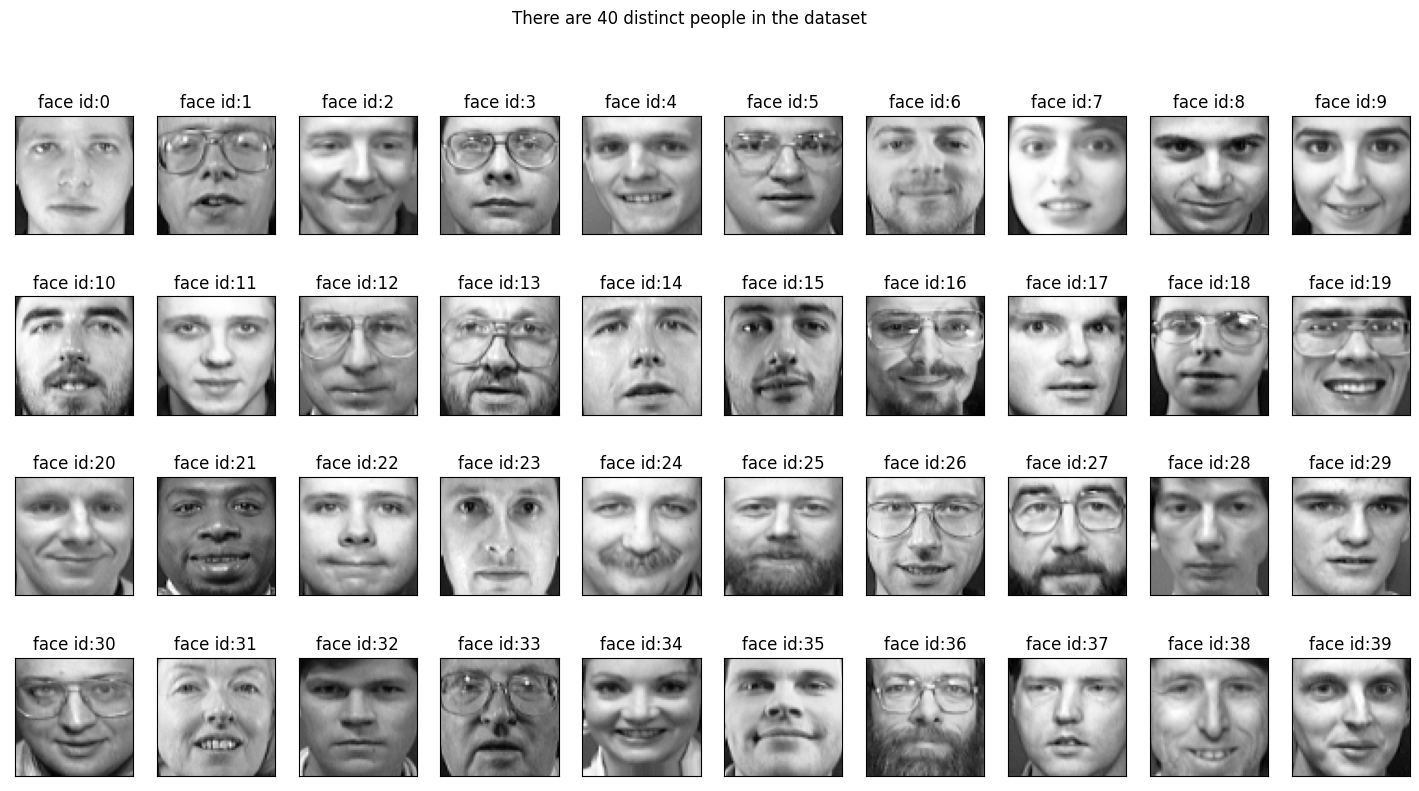

In [78]:
fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
#For easy iteration flattened 4X10 subplots matrix to 40 array
axarr=axarr.flatten()

#iterating over user ids
for unique_id in np.unique(data.target):
    image_index=unique_id*10
    axarr[unique_id].imshow(data.images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("face id:{}".format(unique_id))
plt.suptitle("There are 40 distinct people in the dataset")

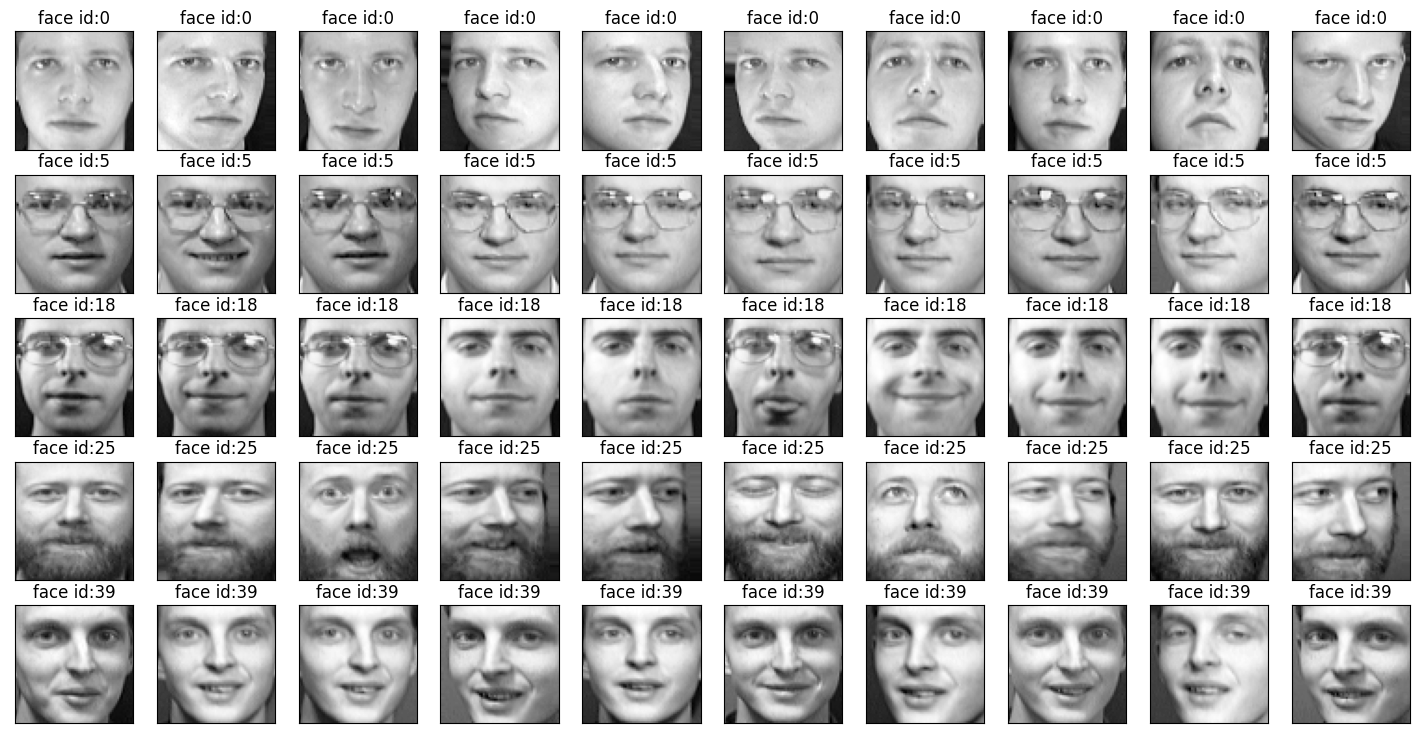

In [79]:
subject_ids = [0,5,18,25,39]
cols=10
rows=(len(subject_ids)*10)/cols #
rows=int(rows)

fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
#axarr=axarr.flatten()

for i, subject_id in enumerate(subject_ids):
    for j in range(cols):
        image_index=subject_id*10 + j
        axarr[i,j].imshow(data.images[image_index], cmap="gray")
        axarr[i,j].set_xticks([])
        axarr[i,j].set_yticks([])
        axarr[i,j].set_title("face id:{}".format(subject_id))

In [80]:
X = data.images.reshape((data.images.shape[0], data.images.shape[1] * data.images.shape[2]))

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, data.target, test_size=0.3, stratify=data.target, random_state=0
)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


Best parameters set found on development set:

{'max_depth': 100, 'n_estimators': 1000}

Grid scores on development set:

0.125 (+/-0.081) for {'max_depth': 1, 'n_estimators': 10}
0.311 (+/-0.123) for {'max_depth': 1, 'n_estimators': 100}
0.428 (+/-0.090) for {'max_depth': 1, 'n_estimators': 1000}
0.511 (+/-0.057) for {'max_depth': 10, 'n_estimators': 10}
0.764 (+/-0.054) for {'max_depth': 10, 'n_estimators': 100}
0.825 (+/-0.057) for {'max_depth': 10, 'n_estimators': 1000}
0.668 (+/-0.092) for {'max_depth': 100, 'n_estimators': 10}
0.854 (+/-0.035) for {'max_depth': 100, 'n_estimators': 100}
0.864 (+/-0.052) for {'max_depth': 100, 'n_estimators': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



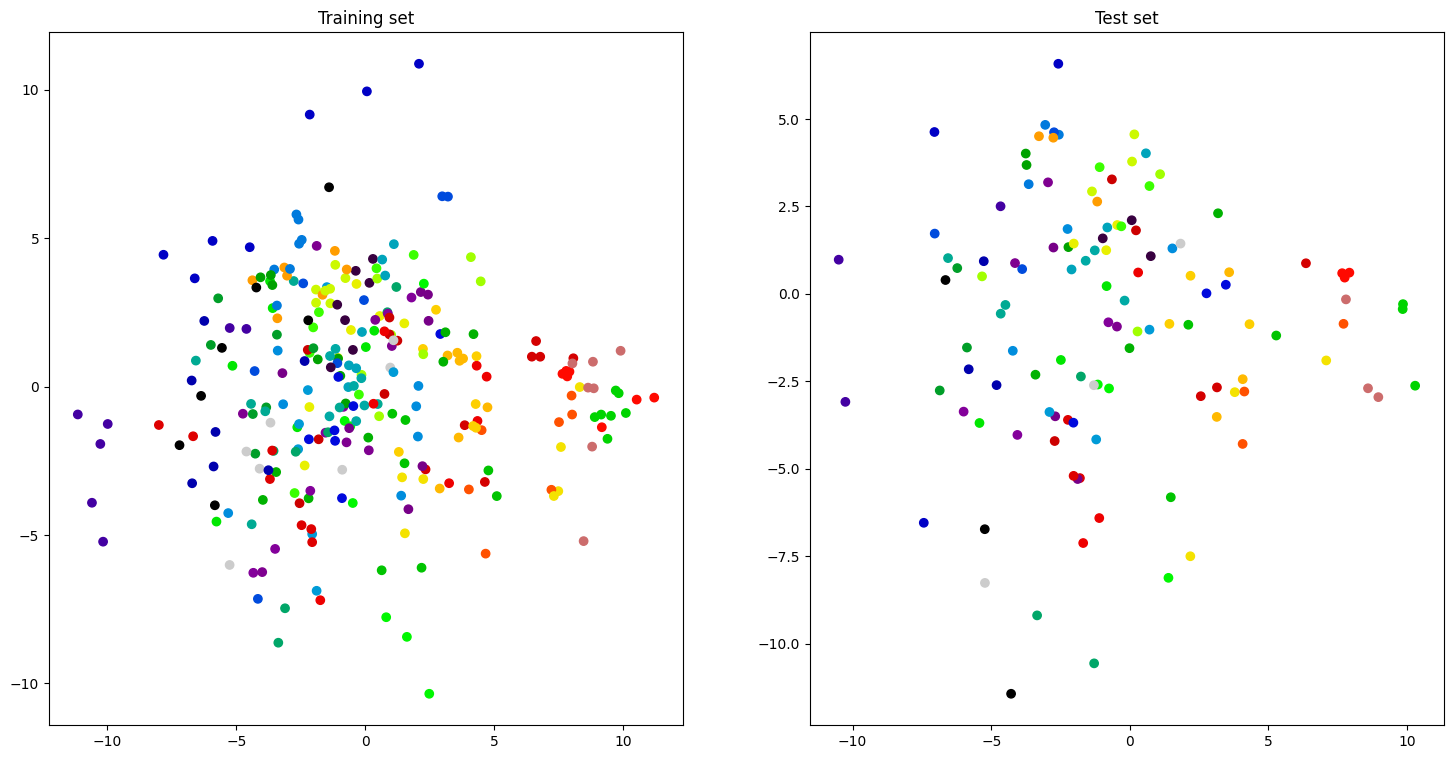

In [82]:
# plot PCA illustration
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
axarr[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='nipy_spectral')
axarr[0].set_title("Training set")
axarr[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='nipy_spectral')
axarr[1].set_title("Test set")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [1, 10, 100]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid_search.predict(X_test)

In [83]:
# import classification_report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       0.75    

In [84]:
# create a random forest classifier with max_depth = 100 and n_estimators = 1000 and fit it to the training data
rf = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=0)
rf.fit(X_train, y_train)

# check the accuracy of the model on the test data
rf.score(X_test, y_test)

0.9333333333333333

In [85]:
# this function accepts and image and returns the predicted match using rf
def predict_match(img, model):
    img = img.reshape((1, img.shape[0] * img.shape[1]))
    match = model.predict(img)
    return match[0]

/var/folders/tk/wz1yhr411g558rt103cxg_cw0000gn/T/ipykernel_7607/2547732118.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(3, 1.5))


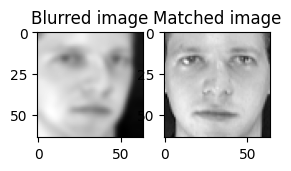

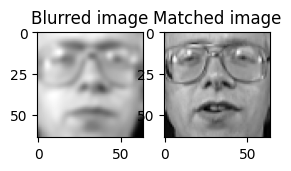

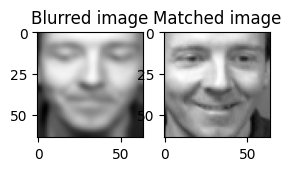

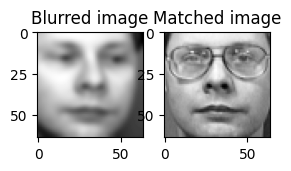

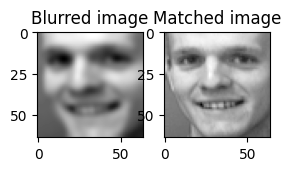

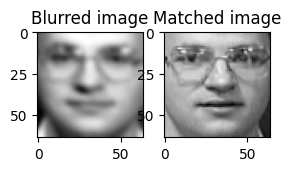

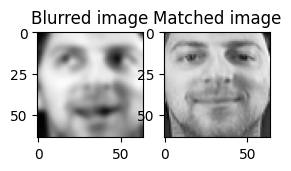

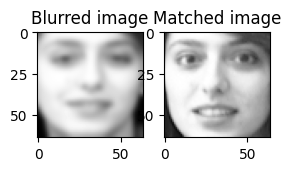

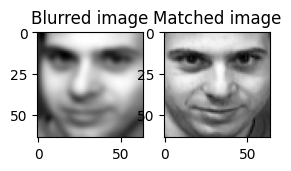

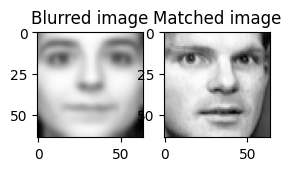

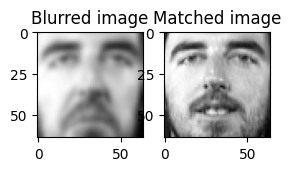

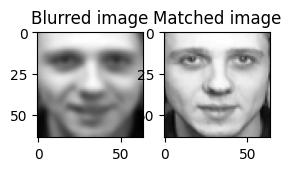

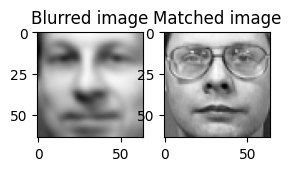

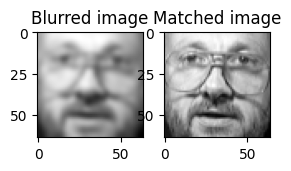

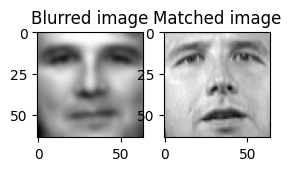

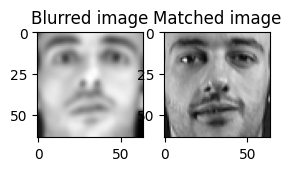

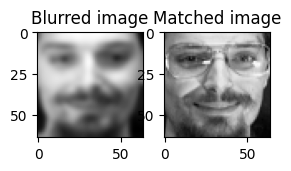

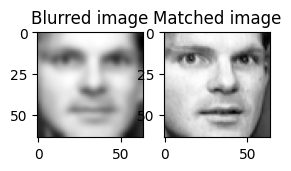

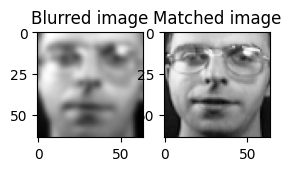

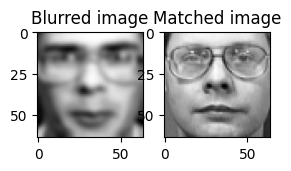

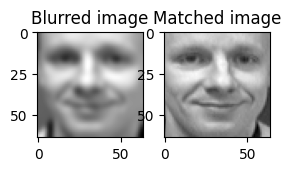

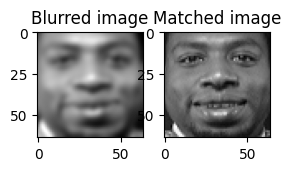

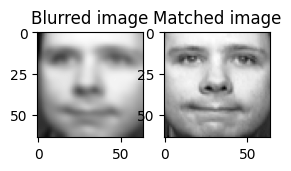

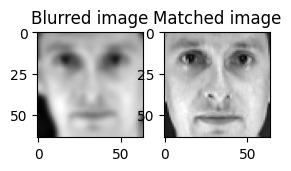

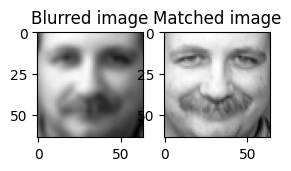

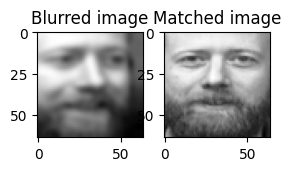

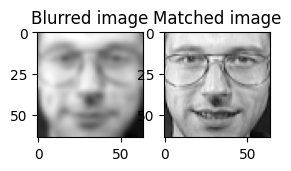

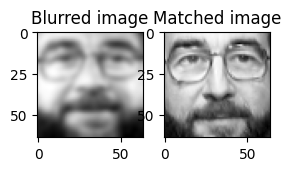

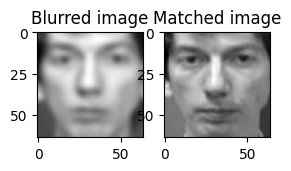

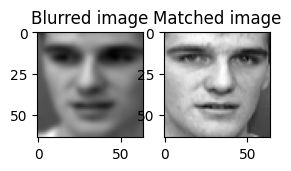

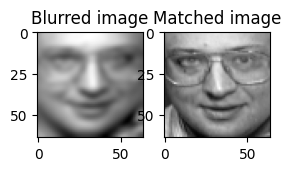

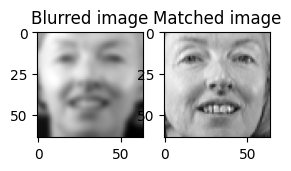

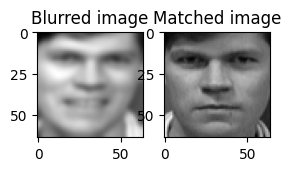

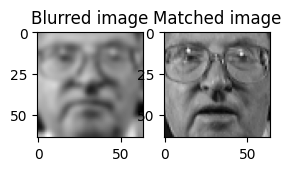

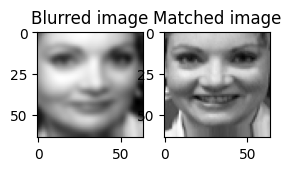

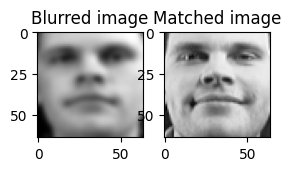

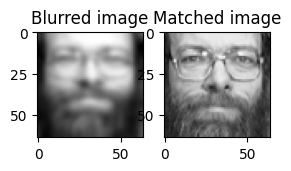

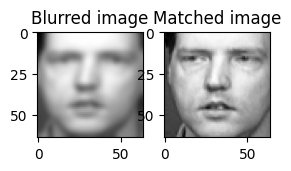

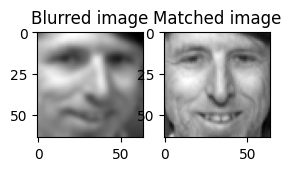

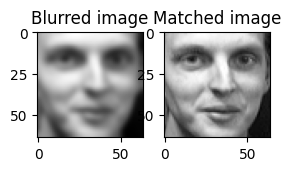

In [86]:
from scipy import ndimage

for i in range(0, 40):
    # generate a random number between i * 10 and (i + 1) * 10 using math
    random_index = np.random.randint(i * 10, (i + 1) * 10)
    # get image at random_index
    img = data.images[random_index]
    # blur the image
    blurred_img = ndimage.gaussian_filter(img, sigma=1.5)
    # plot the blurred image and the predicted image from predict_match
    match_id = predict_match(blurred_img, rf)
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(3, 1.5))
    axarr[0].imshow(blurred_img, cmap='gray')
    axarr[0].set_title("Blurred image")
    axarr[1].imshow(data.images[match_id * 10], cmap='gray')
    axarr[1].set_title("Matched image")